In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.set_style("whitegrid")


<Figure size 600x400 with 0 Axes>

In [3]:
df = pd.read_csv("bank.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df['y'] = df['y'].map({'yes':1, 'no':0})


In [8]:
df['y'].value_counts()


y
0    4000
1     521
Name: count, dtype: int64

In [9]:
total_users = len(df)
leads = len(df[df['contact'] != 'unknown'])
customers = df['y'].sum()

total_users, leads, customers


(4521, 3197, np.int64(521))

In [10]:
traffic_to_lead = leads / total_users
lead_to_customer = customers / leads

print("Traffic → Lead:", round(traffic_to_lead*100,2), "%")
print("Lead → Customer:", round(lead_to_customer*100,2), "%")


Traffic → Lead: 70.71 %
Lead → Customer: 16.3 %


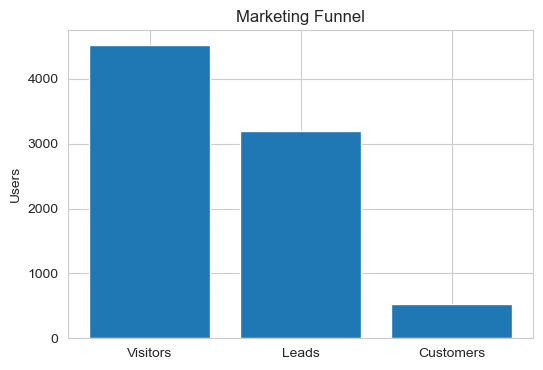

In [11]:
import matplotlib.pyplot as plt

stages = [total_users, leads, customers]
labels = ['Visitors', 'Leads', 'Customers']

plt.figure(figsize=(6,4))
plt.bar(labels, stages)
plt.title("Marketing Funnel")
plt.ylabel("Users")
plt.show()


In [12]:
channel_perf = df.groupby('contact')['y'].mean().sort_values(ascending=False)
channel_perf


contact
telephone    0.146179
cellular     0.143646
unknown      0.046073
Name: y, dtype: float64

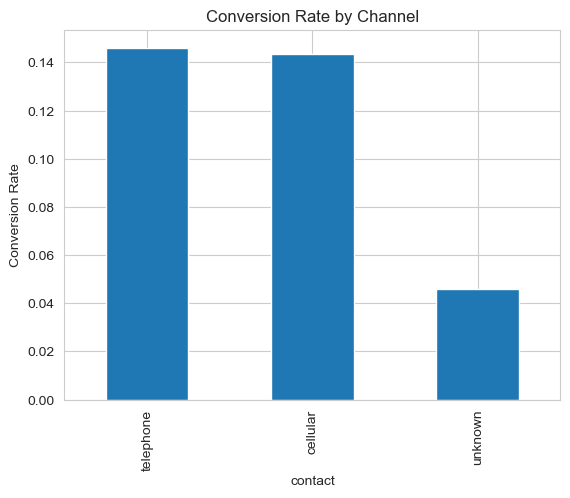

In [13]:
channel_perf.plot(kind='bar')
plt.title("Conversion Rate by Channel")
plt.ylabel("Conversion Rate")
plt.show()


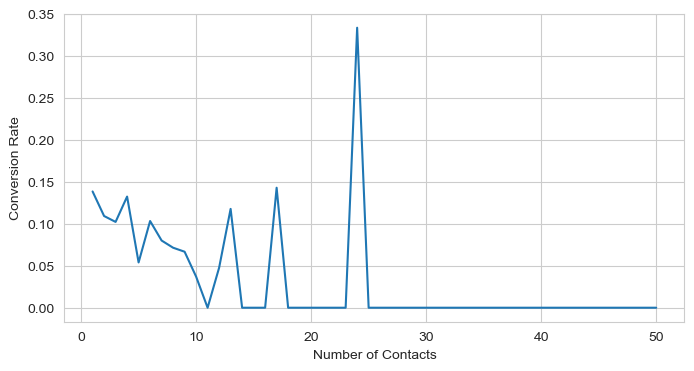

In [14]:
campaign_perf = df.groupby('campaign')['y'].mean()

plt.figure(figsize=(8,4))
campaign_perf.plot()
plt.xlabel("Number of Contacts")
plt.ylabel("Conversion Rate")
plt.show()


In [15]:
print("Dropped before Lead:", total_users - leads)
print("Dropped before Customer:", leads - customers)


Dropped before Lead: 1324
Dropped before Customer: 2676


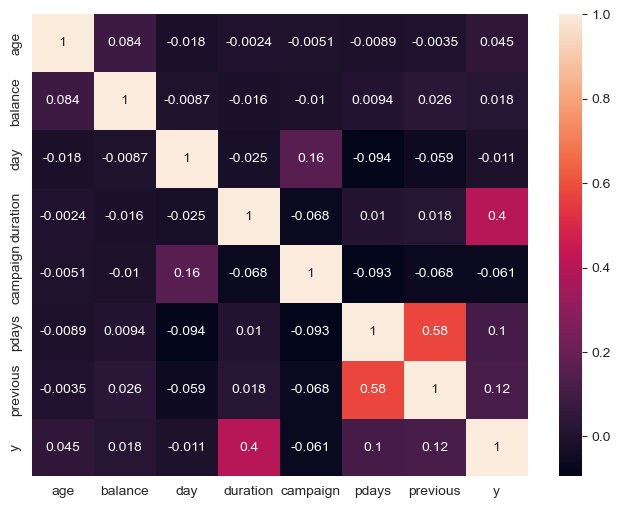

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()
